In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.tseries.offsets import DateOffset
from statsmodels.tsa.arima.model import ARIMA
df=pd.read_csv('car_data.csv')
df['Date']=df['Year'].astype(str)+"-"+df['Month'].astype(str)
df=df[["Date","Quantity"]]
df['Date']
df.rename(columns={"Date":"Month","Quantity":"Sales"},inplace=True)
display(df)
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)
### Testing For Stationarity
display(df)

,Month,Sales
0,2007-1,12685
1,2007-2,9793
2,2007-3,11264
3,2007-4,8854
4,2007-5,12007
...,...,...
116,2016-9,13854
117,2016-10,11932
118,2016-11,13194
119,2016-12,13602


,Sales
Month,
2007-01-01,12685
2007-02-01,9793
2007-03-01,11264
2007-04-01,8854
2007-05-01,12007
...,...
2016-09-01,13854
2016-10-01,11932
2016-11-01,13194


<AxesSubplot:xlabel='Month'>

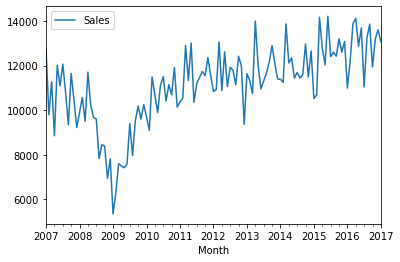

In [3]:
df.plot()

ADF Test Statistic : -0.9724745635068119
p-value : 0.7631707417462781
#Lags Used : 6
Number of Observations Used : 114
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
ADF Test Statistic : -3.940590207821761
p-value : 0.0017556236268835138
#Lags Used : 11
Number of Observations Used : 97
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inf

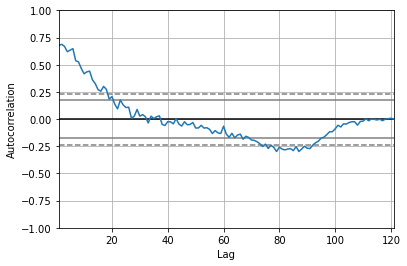

In [4]:
test_result=adfuller(df['Sales'])
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['Sales'])
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
    ## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())
autocorrelation_plot(df['Sales'])
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [5]:
# # !pip install pmdarima
# from pmdarima import auto_arima 

In [6]:
#  stepwise_fit = auto_arima(df["Sales"], start_p = 1, start_q = 1,max_p = 3, max_q = 3, m = 12,start_P = 0, seasonal = True,d = None, D = 1, 
#                             trace = True,error_action ='ignore',suppress_warnings = True, stepwise = True)

In [7]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(2, 0, 2),seasonal_order=(2,1,0,12))
results=model.fit()
results.summary()

C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Rex Milton S\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  121
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood                -929.727
Date:                             Wed, 07 Sep 2022   AIC                           1873.454
Time:                                     17:16:46   BIC                           1892.293
Sample:                                 01-01-2007   HQIC                          1881.094
                                      - 01-01-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1484     14.243      0.010      0.992     -27.767      28.063
ar.L2          0.8313     14.082      0.059      0.953     -26.770      28.432
ma.L1         -0.1221     14.266     -0.009      0.993     -28.084      27.840
ma.L2         -0.8071     13.707     -0.059      0.953     -27.673      26.058
ar.S.L12      -0.5259      0.085     -6.205      0.000      -0.692      -0.360
ar.S.L24      -0.4108      0.054     -7.542      0.000      -0.517      -0.304
sigma2      1.502e+06      0.001   1.95e+09      0.000     1.5e+06     1.5e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.33   Jarque-Bera (JB):                 2.13
Prob(Q):                              0.13   Prob(JB):                         0.35
Heteroskedasticity (H):               0.39   Skew:                            -0.02
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.03e+25. Standard errors may be unstable.
"""

In [8]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [9]:
start=len(df['Sales'])
end=len(df['Sales'])*2-1
predictions = results.predict(start,end,typ='levels',dynamic=True)
display(rmse(df['Sales'],predictions))
display(mean_squared_error(df['Sales'],predictions))

3263.387108014038

10649695.416752225

121

In [24]:
df['forecast']=results.predict(start=length-24,end=length,dynamic=True)
display(df['forecast'])

Month
2007-01-01             NaN
2007-02-01             NaN
2007-03-01             NaN
2007-04-01             NaN
2007-05-01             NaN
                  ...     
2016-09-01    12520.044230
2016-10-01    13567.776901
2016-11-01    12594.547548
2016-12-01    12154.662242
2017-01-01    11860.646156
Name: forecast, Length: 121, dtype: float64

,Sales,Sales First Difference,Seasonal First Difference,forecast
2007-01-01,12685,NaN,NaN,NaN
2007-02-01,9793,-2892.0,NaN,NaN
2007-03-01,11264,1471.0,NaN,NaN
2007-04-01,8854,-2410.0,NaN,NaN
2007-05-01,12007,3153.0,NaN,NaN
...,...,...,...,...
2018-08-01,NaN,NaN,NaN,13354.568723
2018-09-01,NaN,NaN,NaN,13500.461252
2018-10-01,NaN,NaN,NaN,13467.748262
2018-11-01,NaN,NaN,NaN,13323.459268


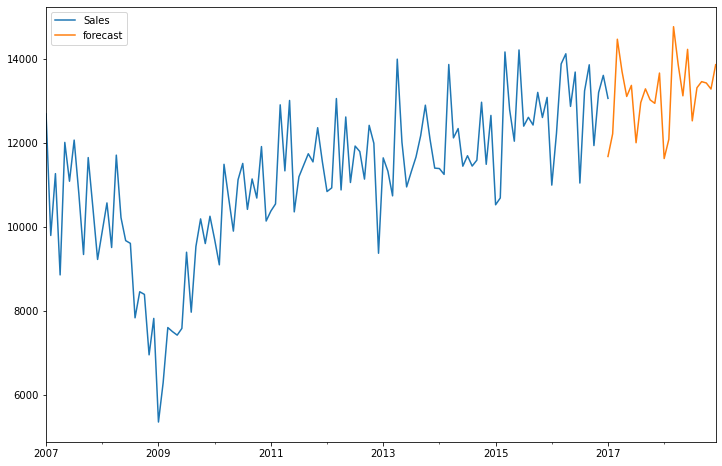

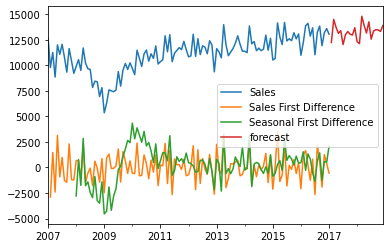

In [43]:

future_dates=[df.index[-1]+ DateOffset(months=x) for x in range(0,24)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)
length=len(df.index)

future_df[['Sales','forecast']].plot(figsize=(12, 8))
future_df=pd.concat([df,future_datest_df])
future_df['forecast']=results.predict(start=length,end=length+24,dynamic=True)
display(future_df)
future_df.plot()

future_df['Dates']=future_df.index
future_df.reset_index(drop=True)
future_df=future_df[['Dates',"Sales","Sales First Difference","Seasonal First Difference",'forecast']]
future_df.to_csv('changed.csv',index=False)

In [44]:
display(future_df)
z=[]
for i in list(future_df.index):
    z.append(str(i).split()[0])
x=list(future_df['Sales'].dropna())
y=list(future_df['forecast'].dropna())
display(z,x,y)

,Dates,Sales,Sales First Difference,Seasonal First Difference,forecast
2007-01-01,2007-01-01,12685,NaN,NaN,NaN
2007-02-01,2007-02-01,9793,-2892.0,NaN,NaN
2007-03-01,2007-03-01,11264,1471.0,NaN,NaN
2007-04-01,2007-04-01,8854,-2410.0,NaN,NaN
2007-05-01,2007-05-01,12007,3153.0,NaN,NaN
...,...,...,...,...,...
2018-08-01,2018-08-01,NaN,NaN,NaN,13354.568723
2018-09-01,2018-09-01,NaN,NaN,NaN,13500.461252
2018-10-01,2018-10-01,NaN,NaN,NaN,13467.748262
2018-11-01,2018-11-01,NaN,NaN,NaN,13323.459268


['2007-01-01',
 '2007-02-01',
 '2007-03-01',
 '2007-04-01',
 '2007-05-01',
 '2007-06-01',
 '2007-07-01',
 '2007-08-01',
 '2007-09-01',
 '2007-10-01',
 '2007-11-01',
 '2007-12-01',
 '2008-01-01',
 '2008-02-01',
 '2008-03-01',
 '2008-04-01',
 '2008-05-01',
 '2008-06-01',
 '2008-07-01',
 '2008-08-01',
 '2008-09-01',
 '2008-10-01',
 '2008-11-01',
 '2008-12-01',
 '2009-01-01',
 '2009-02-01',
 '2009-03-01',
 '2009-04-01',
 '2009-05-01',
 '2009-06-01',
 '2009-07-01',
 '2009-08-01',
 '2009-09-01',
 '2009-10-01',
 '2009-11-01',
 '2009-12-01',
 '2010-01-01',
 '2010-02-01',
 '2010-03-01',
 '2010-04-01',
 '2010-05-01',
 '2010-06-01',
 '2010-07-01',
 '2010-08-01',
 '2010-09-01',
 '2010-10-01',
 '2010-11-01',
 '2010-12-01',
 '2011-01-01',
 '2011-02-01',
 '2011-03-01',
 '2011-04-01',
 '2011-05-01',
 '2011-06-01',
 '2011-07-01',
 '2011-08-01',
 '2011-09-01',
 '2011-10-01',
 '2011-11-01',
 '2011-12-01',
 '2012-01-01',
 '2012-02-01',
 '2012-03-01',
 '2012-04-01',
 '2012-05-01',
 '2012-06-01',
 '2012-07-

[12685,
 9793,
 11264,
 8854,
 12007,
 11083,
 12062,
 10786,
 9340,
 11646,
 10453,
 9222,
 9901,
 10567,
 9506,
 11704,
 10217,
 9670,
 9605,
 7833,
 8453,
 8390,
 6952,
 7819,
 5353,
 6287,
 7601,
 7504,
 7421,
 7581,
 9394,
 7967,
 9530,
 10187,
 9600,
 10250,
 9697,
 9094,
 11486,
 10677,
 9896,
 11119,
 11507,
 10414,
 11137,
 10683,
 11908,
 10136,
 10372,
 10543,
 12901,
 11330,
 13005,
 10354,
 11189,
 11464,
 11737,
 11543,
 12357,
 11550,
 10838,
 10925,
 13051,
 10876,
 12612,
 11053,
 11920,
 11790,
 11134,
 12413,
 11986,
 9369,
 11639,
 11322,
 10735,
 13988,
 12012,
 10948,
 11312,
 11660,
 12168,
 12893,
 12079,
 11395,
 11385,
 11246,
 13861,
 12115,
 12337,
 11441,
 11690,
 11444,
 11585,
 12963,
 11486,
 12649,
 10523,
 10685,
 14159,
 12782,
 12036,
 14207,
 12394,
 12604,
 12421,
 13197,
 12600,
 13078,
 10991,
 12222,
 13875,
 14116,
 12864,
 13681,
 11040,
 13232,
 13854,
 11932,
 13194,
 13602,
 13055]

[12247.325610555772,
 14501.321088047465,
 13730.838086534488,
 13138.029347296186,
 13399.165473799654,
 12035.616131728286,
 12990.454047152685,
 13316.93714471225,
 13054.07169377572,
 12971.547351521029,
 13691.083026485683,
 12312.692296531488,
 12131.732329441193,
 14812.149769783762,
 13902.927147070948,
 13165.818223770513,
 14269.578137260327,
 12568.898772344517,
 13354.568722999791,
 13500.461252435884,
 13467.748261949426,
 13323.459267892471,
 13902.54312952515]